In [1]:
include("../src/Coefplots.jl")
using .Coefplots
# using Coefplots
using FixedEffectModels
using DataFrames
using Random

Random.seed!(1234)

MersenneTwister(1234)

In [2]:
N = 100 # 100 individuals
T = 20 # 20 periods
event_time = 8 # make the third period be the event time
id = repeat(1:N, inner=T) # generate id
is_treated = id .< N/2 # make first half of individuals are treated, last half of indivuduals are controls
time = repeat(1:T, outer=N) .- event_time # generate time
treatment = repeat(rand(N), inner=T) .* is_treated # generate treatment, 0 if obs are controls
outcome = treatment .* (time .> 0) + id + time .+ rand(N*T) # generate outcome, treatment only have an effect after event time
# use face value of id, time as FE, also add a noise.

df = DataFrame(id = id, time = time, outcome = outcome, treatment = treatment)
first(df,10)

,id,time,outcome,treatment
,Int64,Int64,Float64,Float64
1,1,-7,-5.46783,0.590845
2,1,-6,-4.25593,0.590845
3,1,-5,-3.82579,0.590845
4,1,-4,-2.39046,0.590845
5,1,-3,-1.41889,0.590845
6,1,-2,-0.53814,0.590845
7,1,-1,0.854807,0.590845
8,1,0,1.64796,0.590845
9,1,1,3.37571,0.590845


In [3]:
res = reg(df, @formula(outcome ~ time&treatment + fe(id) + fe(time)); contrasts = Dict(:time => DummyCoding(base=0)));

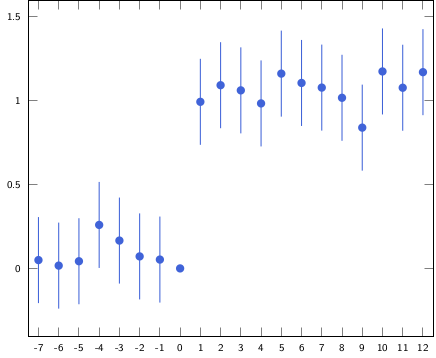

In [4]:
esplot(res; normalized_period = 0)

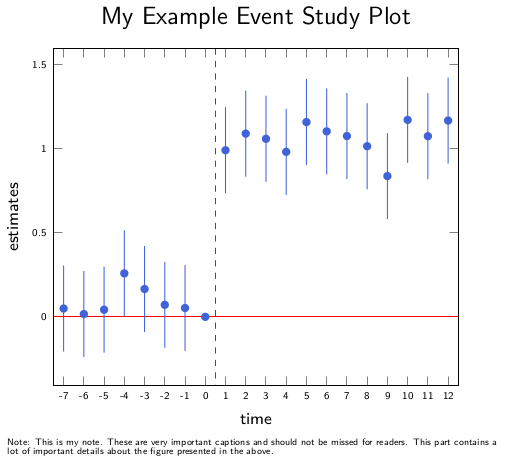

In [5]:
using PGFPlotsX
es_plot = esparse(res; normalized_period = 0)
setxtitle!(es_plot,"time")
setytitle!(es_plot,"estimates")
setname!(es_plot,"My Example Event Study Plot")
includenote!(es_plot,"Note: This is my note. These are very important captions and should not be missed for readers. This part contains a lot of important details about the figure presented in the above.")

addcomponent!(es_plot, @pgf VLine({red, dashed},event_time+0.5)) # add a vertical line red dashed line
addcomponent!(es_plot, @pgf HLine({red},0)) # add a horizontal line red dashed line
plot(es_plot)